In [1]:
# import neccessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
df = pd.read_csv('group_data_cleaning.csv')
df.head()

,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",Did you get your first full time job through your NYSC placement?,...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,No,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
1,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,No,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
2,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,No,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
3,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,No,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
4,Male,2015,Accountancy,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),1,Yes,2017.0,No,...,Naira,11.0,IT/SIWES/Internship experience (gained as part...,Internship,No,Commercial Vehicles,No,Agree,Agree,"Ability to solve complex problems, Knowledge o..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 35 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   What is your gender                                                                                                           2961 non-null   object 
 1   Year of graduation                                                                                                            2961 non-null   int64  
 2   Title of course studied                                                                                                       2961 non-null   object 
 3   Polytechnic/University attended                                                                                  

####  Feature Engineering

In [4]:
df['What is your current monthly income level?'].unique()

array(['200,000 - 249,999', '100,000 - 149,999', '250,000 and more',
       '50,000 - 99,999', 'Under 20000', '20,000 - 49,999',
       '150,000 - 199,999'], dtype=object)

In [5]:
# Create the binary variable 'Income_Above_200K' using a conditional mapping
df['Income_Above_200K'] = df['What is your current monthly income level?'].apply(lambda x: 1 if 'and more' in x or '200,000' in x else 0)


In [6]:
df['Income_Above_200K'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Career Success'] = df['Income_Above_200K']

In [8]:
# check for the unique levels of education
df['What is your highest level of education?'].unique()

array(["Bachelor's degree", 'Higher National Diploma (HND)',
       'Ordinary National Diploma (OND)', "Master's degree", 'MBA degree',
       'PhDs/Doctorate Degree'], dtype=object)

In [9]:
# Create a dictionary to map educational levels
education_levels = {
    'PhDs/Doctorate Degree': 6,
    'MBA degree': 5,
    "Master's degree": 4,
    "Bachelor's degree": 3,
    'Higher National Diploma': 2,
    'Ordinary National Diploma': 1
}

# Map the educational levels to a new feature
df['Educational Achievement Level'] = df['What is your highest level of education?'].map(education_levels)
df['Educational Achievement Level']

0       3.0
1       3.0
2       3.0
3       NaN
4       3.0
       ... 
2956    3.0
2957    3.0
2958    3.0
2959    3.0
2960    NaN
Name: Educational Achievement Level, Length: 2961, dtype: float64

In [10]:
df['Educational Achievement Level'].unique()

array([ 3., nan,  4.,  5.,  6.])

In [11]:
df = df.dropna(subset=['Educational Achievement Level'])
df['Educational Achievement Level'].unique()

array([3., 4., 5., 6.])

In [12]:
#create an experience level
df['Graduation Year'] = pd.to_datetime(df['Year of graduation'], format='%Y')

# Calculate experience level by subtracting graduation year from the current year
current_year = pd.Timestamp('now')
df['Experience Level'] = current_year.year - df['Graduation Year'].dt.year
df['Experience Level']

0       10
1       10
2        8
4        8
5        6
        ..
2955     8
2956     6
2957     7
2958     8
2959     9
Name: Experience Level, Length: 2720, dtype: int64

##### Data Splitting

In [13]:
# Define the target variable
target_column = 'Career Success'
y = df[target_column]

# Define the features or predictors
feature_columns = [
    'Year of graduation',
    'Educational Achievement Level',
    'Experience Level',
    'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
    'What is your current monthly income level?',
]
X = df[feature_columns]

# Preprocess categorical features using label encoding
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classification model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

C:\Users\balo_\AppData\Local\Temp\ipykernel_6488\2423550814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00        27

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544



In [14]:
df['Career Success'].unique()

array([1, 0], dtype=int64)

In [15]:
#split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the validation dataset
y_val_pred = model.predict(X_val)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
confusion = confusion_matrix(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[517   0]
 [  0  27]]


In [16]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Lasso Regression with increased max_iter
lasso = Lasso(alpha=1.0, max_iter=10000)  # Increase max_iter
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Linear Regression MSE:", mse_lr)
print("Lasso Regression MSE:", mse_lasso)
print("Ridge Regression MSE:", mse_ridge)


Linear Regression MSE: 0.047088619540719426
Lasso Regression MSE: 0.04759665096507353
Ridge Regression MSE: 0.04717483706282427


In [17]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)


Mean Squared Error: 0.047088619540719426
R-squared (R2): 0.001703724306731047


In [18]:
# Initialize and train the Random Forest Regressor model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
random_forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the Random Forest Regressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared (R2):", r2_rf)


Random Forest Mean Squared Error: 0.0
Random Forest R-squared (R2): 1.0


#### Evaluation Metrics

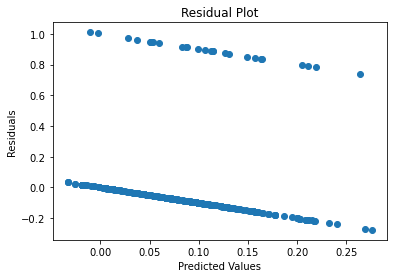

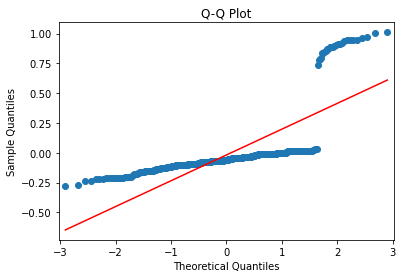

In [19]:
y_true = y_test
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2)
r2 = r2_score(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Residual Plot
residuals = y_true - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Q-Q Plot
import statsmodels.api as sm
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot")
plt.show()


#### Interpretations


Accuracy: The model correctly predicted all instances in the dataset.
Precision:For class 0, the precision is 1.00, which means that all instances predicted as class 0 were correct.
For class 1, the precision is also 1.00, indicating that all instances predicted as class 1 were correct.
Recall:A recall of 1.00 for both classes indicates that the model correctly identified all instances of both classes.
F1-Score:F1-score of 1.00 for both classes suggests a perfect balance between precision and recall for both classes
Support:For class 0, there are 517 instances, and for class 1, there are 27 instances.


Linear Regression MSE: 0.047088619540719426
For the Linear Regression model, the MSE is approximately 0.0471.
This value indicates that, on average, the squared difference between the actual and predicted values is 0.0471.
A lower MSE suggests that the model's predictions are closer to the actual values, which is a good sign of model performance.
Lasso Regression MSE: 0.04759665096507353
For the Lasso Regression model, the MSE is slightly higher, approximately 0.0476.
This means that the Lasso model's predictions have a slightly higher average squared difference from the actual values compared to the Linear Regression model.
The Lasso Regression model introduces L1 regularization, which can lead to feature selection and result in slightly different predictive performance compared to linear regression.
Ridge Regression MSE: 0.04717483706282427
For the Ridge Regression model, the MSE is approximately 0.0472.
The Ridge model's performance falls between that of Linear Regression and Lasso Regression.

Mean Squared Error (MSE):the MSE is approximately 0.0471. This means that, on average, the squared difference between the actual and predicted values is 0.0471.
A lower MSE indicates that the model's predictions are closer to the actual values.
